<a href="https://colab.research.google.com/github/JuanMa312/Practicando-Python-para-Data-Science-Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:

# Lista de URLs y nombres de tiendas
urls = [
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv", "Tienda 1"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv", "Tienda 2"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv", "Tienda 3"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv", "Tienda 4"),
]

# Lectura y unión de los archivos
dataframes = []
for url, nombre in urls:
    df = pd.read_csv(url)
    df["tienda"] = nombre
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)

# Cálculo de los ingresos de cada tienda
df["Ingreso"] = df["Precio"]
ingresos = df.groupby("tienda")["Ingreso"].sum().sort_values(ascending=False)

# Análisis de mayor y menor ingreso por tienda
mejor = ingresos.idxmax()
peor = ingresos.idxmin()

# Mostrar facturación total de cada tienda
print("Facturación total de cada tienda:\n")
print(f"{'Tienda':<10} | {'Facturación Total (COP)':>22}")
print("-" * 40)

for tienda, total in ingresos.items():
    print(f"{tienda:<10} | ${total:>20,.0f}.-")

print(f"\n* La tienda con mayores ingresos es {mejor}, con un total de: $ {ingresos.max():,.0f} COP.")
print(f"\n* La tienda con menores ingresos es {peor}, con un total de: $ {ingresos.min():,.0f} COP.\n")



Facturación total de cada tienda:

Tienda     | Facturación Total (COP)
----------------------------------------
Tienda 1   | $       1,150,880,400.-
Tienda 2   | $       1,116,343,500.-
Tienda 3   | $       1,098,019,600.-
Tienda 4   | $       1,038,375,700.-

* La tienda con mayores ingresos es Tienda 1, con un total de: $ 1,150,880,400 COP.

* La tienda con menores ingresos es Tienda 4, con un total de: $ 1,038,375,700 COP.



# 2. Ventas por categoría

In [ ]:

# Contar productos vendidos por categoría
ventas_por_categoria = df.groupby("Categoría del Producto").size().sort_values(ascending=False)


# Agrupar cantidad total vendida por categoría
ventas_por_categoria = df.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

# Mostrar tabla
print("Ventas totales por categoría (todas las tiendas):\n")
print(f"{'Categoría':<25} | {'Cantidad Vendida'}")
print("-" * 45)

for categoria, cantidad in ventas_por_categoria.items():
    print(f"{categoria:<25} | {cantidad:>16,}")

categoria_top = ventas_por_categoria.idxmax()
cantidad_top = ventas_por_categoria.max()
print(f"\nLa categoría más vendida fue '{categoria_top}', con un total de {cantidad_top:,} unidades.\n")

Ventas totales por categoría (todas las tiendas):

Categoría                 | Cantidad Vendida
---------------------------------------------
Muebles                   |            5,511
Electrónicos              |            5,229
Juguetes                  |            3,606
Electrodomésticos         |            3,434
Deportes y diversión      |            3,175
Instrumentos musicales    |            2,312
Libros                    |            2,239
Artículos para el hogar   |            2,114

La categoría más vendida fue 'Muebles', con un total de 5,511 unidades.



# 3. Calificación promedio de la tienda


In [ ]:

# Calificación promedio por tienda
calificaciones = df.groupby("tienda")["Calificación"].mean().sort_values(ascending=False)

print("Calificación promedio por tienda:\n")
print(f"{'Tienda':<10} | {'Calificación Promedio'}")
print("-" * 35)

for tienda, prom in calificaciones.items():
    print(f"{tienda:<10} | {prom:>8.2f} estrellas")

# Análisis textual
mejor = calificaciones.idxmax()
peor = calificaciones.idxmin()

print(f"\n* La tienda con mejor calificación promedio es la {mejor}, con {calificaciones.max():.2f} estrellas.\n")
print(f"* La tienda con peor calificación promedio es la {peor}, con {calificaciones.min():.2f} estrellas.")


Calificación promedio por tienda:

Tienda     | Calificación Promedio
-----------------------------------
Tienda 3   |     4.05 estrellas
Tienda 2   |     4.04 estrellas
Tienda 4   |     4.00 estrellas
Tienda 1   |     3.98 estrellas

* La tienda con mejor calificación promedio es la Tienda 3, con 4.05 estrellas.

* La tienda con peor calificación promedio es la Tienda 1, con 3.98 estrellas.


# 4. Productos más y menos vendidos

In [ ]:
# Contar el total de ventas por producto
ventas_por_producto = df["Producto"].value_counts()

# Separar los 10 productos más vendidos y los 10 menos vendidos
mas_vendidos = ventas_por_producto.head(10)
menos_vendido = ventas_por_producto.tail(10)

# Tabla: 10 Productos más vendidos
print(f"{'Productos más vendidos:':<35} | {'Unidades Vendidas'}")
print("-" * 60)
for producto, cantidad in mas_vendidos.items():
    print(f"{producto:<35} | {cantidad:>8,}")

# Tabla: 10 Productos menos vendidos
print(f"\n{'Productos menos vendidos:':<35} | {'Unidades Vendidas'}")
print("-" * 60)
for producto, cantidad in menos_vendido.items():
    print(f"{producto:<35} | {cantidad:>8,}")

Productos más vendidos:             | Unidades Vendidas
------------------------------------------------------------
Mesa de noche                       |      210
Carrito de control remoto           |      206
Microondas                          |      206
Batería                             |      203
Cama king                           |      201
Secadora de ropa                    |      200
Modelado predictivo                 |      200
Set de ollas                        |      200
Cama box                            |      199
Bloques de construcción             |      199

Productos menos vendidos:           | Unidades Vendidas
------------------------------------------------------------
Olla de presión                     |      172
Smartwatch                          |      172
Set de vasos                        |      169
Sillón                              |      168
Asistente virtual                   |      167
Ciencia de datos con Python         |      166
Guitarra eléc

# 5. Envío promedio por tienda

In [ ]:

# Agrupar por tienda y calcular costo promedio de envío
costo_envio_promedio = df.groupby("tienda")["Costo de envío"].mean().round(0).sort_values()

# Tabla: Costo promedio de envío por tienda
print("Costo promedio de envío por tienda:\n")
print(f"{'Tienda':<10} | {'Costo Promedio (COP)'}")
print("-" * 35)

for tienda, costo in costo_envio_promedio.items():
    print(f"{tienda:<10} | ${int(costo):>10,}")

# Análisis textual
tienda_mas_economica = costo_envio_promedio.idxmin()
tienda_mas_costosa = costo_envio_promedio.idxmax()
minimo = costo_envio_promedio.min()
maximo = costo_envio_promedio.max()

print(f"\n*La tienda con el envío más económico es la {tienda_mas_economica}, con un promedio de ${int(minimo):,} COP.\n")
print(f"*La tienda con el envío más costoso es la {tienda_mas_costosa}, con un promedio de ${int(maximo):,} COP.")

Costo promedio de envío por tienda:

Tienda     | Costo Promedio (COP)
-----------------------------------
Tienda 4   | $    23,459
Tienda 3   | $    24,806
Tienda 2   | $    25,216
Tienda 1   | $    26,019

*La tienda con el envío más económico es la Tienda 4, con un promedio de $23,459 COP.

*La tienda con el envío más costoso es la Tienda 1, con un promedio de $26,019 COP.


# 6. Gráficos



### 1. Gráfico de Barras: Ingresos Totales por Tienda
Este gráfico muestra la facturación total por tienda en pesos colombianos. Permite comparar el rendimiento financiero de cada tienda de forma clara y directa.


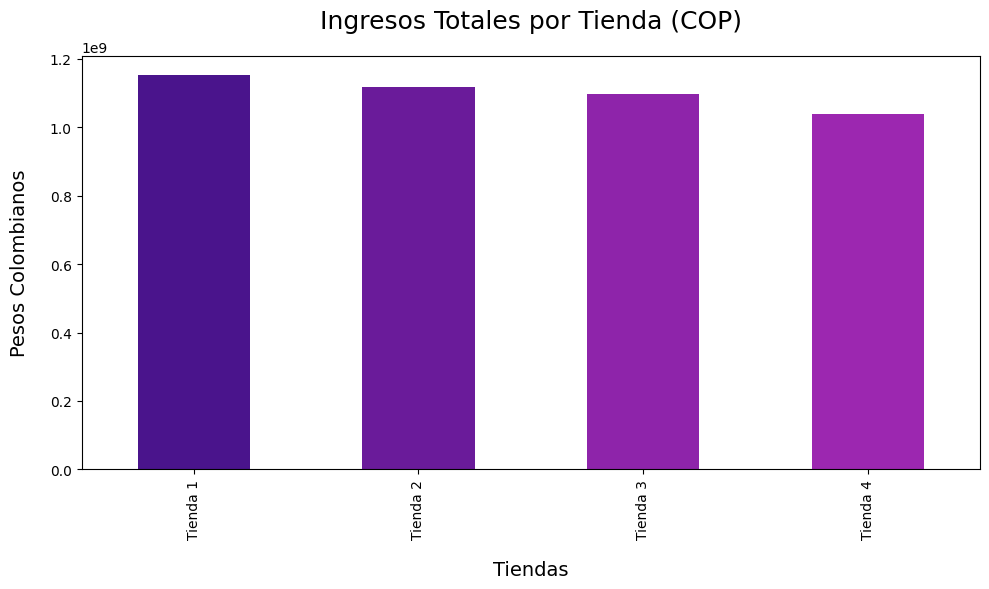

In [ ]:
# Importa funciones útiles de Jupyter/IPython
from IPython.display import display, Markdown

# Gráfico de barras con tonos morados
display(Markdown("""
### 1. Gráfico de Barras: Ingresos Totales por Tienda
Este gráfico muestra la facturación total por tienda en pesos colombianos. Permite comparar el rendimiento financiero de cada tienda de forma clara y directa.
"""))

plt.figure(figsize=(10, 6))

# Paleta de morados
colores_morados = ["#4A148C", "#6A1B9A", "#8E24AA", "#9C27B0", "#AB47BC", "#BA68C8", "#CE93D8", "#E1BEE7"]

# Si quieres que cada barra tenga un tono distinto de morado
ingresos.plot(kind="bar", color=colores_morados[:len(ingresos)])

# Si prefieres todas las barras del mismo morado, usa:
# ingresos.plot(kind="bar", color="#8E24AA")

plt.title("Ingresos Totales por Tienda (COP)", fontsize=18, pad=20 )
plt.ylabel("Pesos Colombianos", fontsize=14, labelpad=15)
plt.xlabel("Tiendas", fontsize=14, labelpad=15)
plt.tight_layout()
plt.show()



### 2. Gráfico Circular: Distribución de Ventas por Categoría
Esta visualización permite identificar qué categorías de productos tienen mayor participación en las ventas generales. Ideal para comprender el enfoque comercial de la empresa.


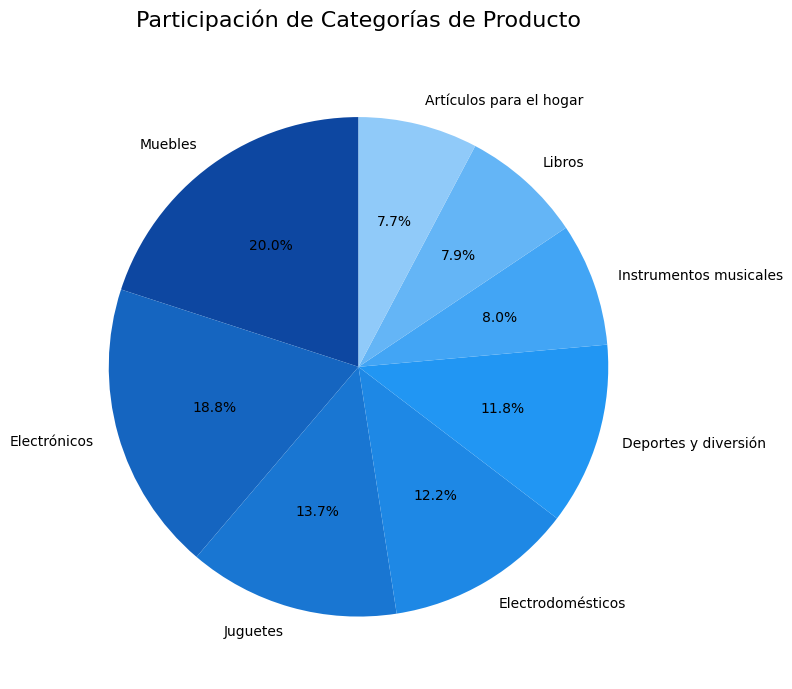

In [ ]:
# Gráfico circular con paleta de azules
display(Markdown("""
### 2. Gráfico Circular: Distribución de Ventas por Categoría
Esta visualización permite identificar qué categorías de productos tienen mayor participación en las ventas generales. Ideal para comprender el enfoque comercial de la empresa.
"""))

ventas_por_categoria = df["Categoría del Producto"].value_counts()

# Paleta de azules (puedes ampliar o reducir la lista según el número de categorías)
colores_azules = ["#0D47A1", "#1565C0", "#1976D2", "#1E88E5", "#2196F3", "#42A5F5", "#64B5F6", "#90CAF9"]

plt.figure(figsize=(8, 8))
ventas_por_categoria.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=colores_azules[:len(ventas_por_categoria)]  # Ajusta al número de categorías
)
plt.title("Participación de Categorías de Producto", fontsize=16, pad=20)
plt.ylabel("")
plt.tight_layout()
plt.show()




### 3. Gráfico de Dispersión: Relación entre Ventas y Calificación Promedio de Clientes
Este gráfico muestra cómo se relaciona el volumen de ventas con la calificación promedio de los clientes por tienda. Es útil para evaluar el equilibrio entre cantidad vendida y satisfacción del cliente.


/tmp/ipython-input-615128145.py:22: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(


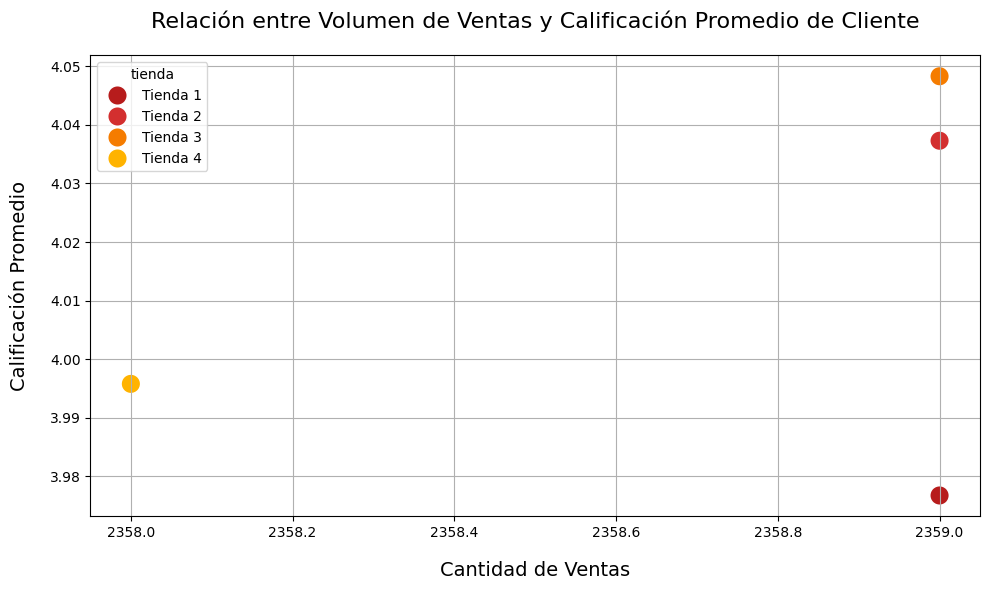

In [ ]:
# Importaciones necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Gráfico de dispersión
display(Markdown("""
### 3. Gráfico de Dispersión: Relación entre Ventas y Calificación Promedio de Clientes
Este gráfico muestra cómo se relaciona el volumen de ventas con la calificación promedio de los clientes por tienda. Es útil para evaluar el equilibrio entre cantidad vendida y satisfacción del cliente.
"""))

ventas_y_calif = df.groupby("tienda").agg({
    "Calificación": "mean",
    "Producto": "count"  # número de ventas
}).rename(columns={"Producto": "Ventas", "Calificación": "Calificación promedio"}).reset_index()

plt.figure(figsize=(10, 6))

# Paleta cálida de rojos, naranjas y amarillos
colores_calidos = ["#B71C1C", "#D32F2F", "#F57C00", "#FFB300", "#FFD54F"]

sns.scatterplot(
    data=ventas_y_calif,
    x="Ventas",
    y="Calificación promedio",
    hue="tienda",
    palette=colores_calidos,
    s=200
)

plt.title("Relación entre Volumen de Ventas y Calificación Promedio de Cliente", fontsize=16, pad=20)
plt.xlabel("Cantidad de Ventas", fontsize=14, labelpad=15)
plt.ylabel("Calificación Promedio", fontsize=14, labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()
